# WIP

## Table of Contents

### 1. [Introduction](#introduction)
### 2. [Data Handling](#datahandling)
### 3. [Data insight and visualization](#datainsight)
### 4. [Basic statistics](#basic-statistics)
### 5. [Data preperation for machine learning](#dataprep)
### 6. [Model training and analysis](#model-train)
### 7. [Discussion and implementation](#discussion)
### 8. [Conclusion](#conclusion)
### 9. [References](#references)
### 10. [Word Count](#word-count)

## 1. Introduction <a class="anchor" id="introduction"></a>

The idea of this project is that we want to try and predict the stock price of Telenor ASA. We are going to try to make a model that takes in several variables and uses them to make a prediction as precise as possible. Of the variables we incorporate in our model at the start of this project, we will analyze which of them make the model better and eliminate the rest.
We acknowledge that making precise predictions about Telenor’s stock price is rather far fetched, seeing that if it were this easy people all over the world would do the same,


## 2. Data Handling <a class="anchor" id="datahandling"></a>

### a. Finding appropriate dataset

Our dependent variable must obviously be Telenor ASA's stock prices over a certain amount of time, seeing that this is what we want to be able to predict. From "Yahoo! Finance" we found Telenor's monthly stock price in Norwegian kroner as of 01.31.2010 to 09.31.2022. In the Dataframe that we make later in this task we have call the Telenor's monthly stock price series for "TEL". 

To predict the stock price as best as we possibly can, we want to gather data on different variables that we believe will have a significant effect on the stock price. If the variables have a significant effect, they will help us predict the price. We have gathered a variety of different data/ variables that expand over the same time span as our dependent variable "TEL". These independent variables are: 

        1. SP500 (which is a market-capitalization-weighted index of the 500 leading publicly traded companies in the U.S.)
        2. VIX (Is a measure of the market's expectation of volatility)
        3. BRENT_SPOT (Is the monthly pricing of crude oil)
        4. DNB ("Den Norske Bank's" monthly stock price)
        5. FDX (Fedex monthly stock price)
        6. EQNR (Equinor's monthly stock price)
        7. MOWI (Norway's biggest exporter of seafood)
        8. Monthly_KPI (The Norwegian monthly consumer price index)
        9. Policy_rate (The Norwegian monthly policy rate)
        10. TEL_PCT_Change (The monthly change in Telenor's stock price, in percent)
        11. TEL_IS_POS (Whether the monthly change in Telenor's stock price is positive or negative)

* S&P 500 is often used as standard measuring tool for market growth. Therefore, we believe it is a good indicator for general economic growth and a variable that will have correlation too our dependent variable.
* We believe the independent variable "VIX" is relevant because it tells us something about how the investors feel about the market at a certain moment in time. If the investors believe that the market is stable and safe that will encourage more investments in the stock market, and thus a higher stock price. If the investors expect a volatile market, they will be more reluctant to invest in the market.
* The reason behind why we have included the variables "BRENT_SPOT" and "MOWI" is that Telenor ASA is on the Norwegian stock exchange which is heavily influenced by oil and salmon prices. 
* DNB and Equinor are both big Norwegian companies that, just like Telenor, are partly owned by the Norwegian government. They also are all on the Norwegian stock exchange. We therefore think that their stock prices will have some correlation and make our prediction model better.
* The FedEx stock we believe to be relevant because they are a company that transports goods all over the world. This means that FedEx quite likely will feel the changes in the world economy due to the fact that less goods will be transported in bad times, and vise versa.
* We have also included the Norwegian policy rate. That's because increase in the policy rate will make investors less likely to invest and vise versa. This makes the policy rate important as to whether people will be investing in the stock market.
* We have included the monthly consumer price index because we want to see if increases or decreases in the index will influence Telenor's stock price. Will more people buy Telenor services when the index increases which then betters the stock price?
* The last two variables, "TEL_PCT_Change" and "TEL_IS_POS", are made of our dependent variable "TEL". We have coded these so that we could get one variable for the monthly change in stock price, and the other we coded into a dummy-variable that tells us if the stock price has gone up or down since the last month stock price. 

We have used different sources to gather our data, which we then have made into different variables. We used "Yahoo! Finance" to get the following variables: SP500, VIX, BRENT_SPOT, DNB, FDX, TEL, EQNR and MOWI. For "Monthly_KPI" we found our data on the website of the National Statistical Institute of Norway. The data on Policy rate we retrieved from the Sentral Bank of Norway's website. 

Yahoo! Finance is a well-known, highly regarded media institute that provides financial news and data on large number of businesses from all around the world. Seeing as Yahoo is a rather big media house, we believe that the data they provide is both accurate and trustworthy. Our two other sources, the National statistical Institute of Norway, and the Sentral Bank of Norway, are well established governmental institutions. We have no reasons not to trust the data we have retrieved from their webpages.



### b. Creating our dataset

We start of by importing the packages we need for our coding.

In [2]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics
#from keras.models import Sequential
#from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
#import tensorflow as tf
import numpy as np
import pandasdmx as sdmx
from pyjstat import pyjstat
import requests

C:\Users\Jørgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandasdmx\remote.py:11: RuntimeWarning: optional dependency requests_cache is not installed; cache options to Session() have no effect
  warn(


Now we retrieve data from Yahoo! Finance. Amongst the data we find here is all the monthly stock prices we discussed above as well as the measurement of volatility ("VIX"), and the S&P500 index. The S&P500 index is the variable called "'^GSPC". We should also note that we limit our time span by defining when we want the start of our data, and when it should end. We also see that from all the data we retrieve we save it into a data frame called "df", for now.

In [3]:
stocks = ['^GSPC', "^VIX" , 'BZ=F', 'DNB.OL',"FDX", 'TEL.OL', 'EQNR.OL', "MOWI.OL"]
f = web.DataReader(stocks, 'yahoo',start='2010-01-01',end='2022-09-30')
df = f[[("Close", s) for s in stocks]]
df.columns = df.columns.droplevel(level=0)
df.reset_index(inplace=True)

In [4]:
df.tail()

Symbols,Date,^GSPC,^VIX,BZ=F,DNB.OL,FDX,TEL.OL,EQNR.OL,MOWI.OL
3285,2022-09-26,3655.040039,32.259998,84.059998,176.000000,142.899994,103.449997,344.450012,173.449997
3286,2022-09-27,3647.290039,32.599998,86.269997,177.000000,144.949997,106.550003,352.799988,170.050003
3287,2022-09-28,3719.040039,30.180000,89.320000,174.449997,149.990005,104.400002,353.799988,137.899994
3288,2022-09-29,3640.469971,31.840000,88.489998,169.300003,152.309998,101.500000,348.950012,133.550003
3289,2022-09-30,3585.620117,31.620001,87.959999,172.850006,148.470001,99.660004,358.100006,138.500000


In the table right above, we have printed the last 5 rows in the data frame "df". We should here note that the data is shown day by day, and that the last row is dated to 30.09.2022. We see this under the column called "Date".

The underlying code transforms our data from daily changes into monthly changes. Also, we rename our dataframe from "df" to "stocksmonthly". 

In [5]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
stocksmonthly = df.resample('1M').mean()

Then we rename our column names so that they are easier to both interpret and to use in our later coding. Names that for example use "dot", can become points of error when coding. Therefore, we minimize possible errors by changing the names.

In [6]:
stocksmonthly.rename(columns={"DNB.OL" : "DNB"}, inplace=True)
stocksmonthly.rename(columns={"MOWI.OL" : "MOWI"}, inplace=True)
stocksmonthly.rename(columns={"TEL.OL" : "TEL"}, inplace=True)
stocksmonthly.rename(columns={"EQNR.OL" : "EQNR"}, inplace=True)
stocksmonthly.rename(columns={"^GSPC" : "SP500"}, inplace=True)
stocksmonthly.rename(columns={"^VIX" : "VIX"}, inplace=True)
stocksmonthly.rename(columns={"BZ=F" : "BRENT_SPOT"}, inplace=True)

In [7]:
stocksmonthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 2010-01-31 to 2022-09-30
Freq: M
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SP500       153 non-null    float64
 1   VIX         153 non-null    float64
 2   BRENT_SPOT  153 non-null    float64
 3   DNB         152 non-null    float64
 4   FDX         153 non-null    float64
 5   TEL         153 non-null    float64
 6   EQNR        153 non-null    float64
 7   MOWI        153 non-null    float64
dtypes: float64(8)
memory usage: 10.8 KB


We notice in the infochart that our DNB variable is incomplete. We will address this by filling it with the mean of the month prior, and the month after, ensuring a not to unrealsitic estimate.

In [8]:
stocksmonthly["DNB"] = (stocksmonthly["DNB"].ffill()+stocksmonthly["DNB"].bfill())/2

Now we gather the data from National statistical institute of Norway. The coding that we use to fetch this data we found on the National statistical institute's website. When one finds data on their websites the institute have also written how to fetch their data onto different platforms. This made it easy for us to retrieve the data and use it for our model.  

In [9]:
POST_URL = 'https://data.ssb.no/api/v0/no/table/05327/'

In [10]:
payload = {
  "query": [
    {
      "code": "Konsumgrp",
      "selection": {
        "filter": "item",
        "values": [
          "JA_TOTAL"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "KPIJustIndMnd"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2010M01",
          "2010M02",
          "2010M03",
          "2010M04",
          "2010M05",
          "2010M06",
          "2010M07",
          "2010M08",
          "2010M09",
          "2010M10",
          "2010M11",
          "2010M12",
          "2011M01",
          "2011M02",
          "2011M03",
          "2011M04",
          "2011M05",
          "2011M06",
          "2011M07",
          "2011M08",
          "2011M09",
          "2011M10",
          "2011M11",
          "2011M12",
          "2012M01",
          "2012M02",
          "2012M03",
          "2012M04",
          "2012M05",
          "2012M06",
          "2012M07",
          "2012M08",
          "2012M09",
          "2012M10",
          "2012M11",
          "2012M12",
          "2013M01",
          "2013M02",
          "2013M03",
          "2013M04",
          "2013M05",
          "2013M06",
          "2013M07",
          "2013M08",
          "2013M09",
          "2013M10",
          "2013M11",
          "2013M12",
          "2014M01",
          "2014M02",
          "2014M03",
          "2014M04",
          "2014M05",
          "2014M06",
          "2014M07",
          "2014M08",
          "2014M09",
          "2014M10",
          "2014M11",
          "2014M12",
          "2015M01",
          "2015M02",
          "2015M03",
          "2015M04",
          "2015M05",
          "2015M06",
          "2015M07",
          "2015M08",
          "2015M09",
          "2015M10",
          "2015M11",
          "2015M12",
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [11]:
result = requests.post(POST_URL, json = payload)

In [12]:
dataset = pyjstat.Dataset.read(result.text)
KPI_JA = dataset.write('dataframe')

We have now retrieved data on Norway's monthly consumer price index and assigned it to the variable "KPI_JA. Note, that we have used "KPI-JA" which also includes energy prices, while there also exists something called KPI-JAE which does not include energy prices. It is noteworthy seeing that general energy prices have skyrocketed that last year or two. 

In the next coding bracket, we insert our newly fetched data into our data frame "Stocksmonthly".

In [13]:
stocksmonthly["Monthly_KPI"] = KPI_JA["value"].values

Now we retrieve data about the Norwegian policy rate from the Sentral Bank of Norway's website and print the 5 first rows to show the data.

In [14]:
rate = pd.read_csv("https://data.norges-bank.no/api/data/IR/M.KPRA.SD.R?apisrc=qb&format=csv&startPeriod=2010-01-01&endPeriod=2022-09-01&locale=no&bom=include", sep=";", decimal=",")

In [15]:
rate.head()

,FREQ,Frekvens,INSTRUMENT_TYPE,Instrumenttype,TENOR,Løpetid,UNIT_MEASURE,Måleenhet,DECIMALS,COLLECTION,Innsamlingstidspunkt,TIME_PERIOD,OBS_VALUE,CALC_METHOD,Calculation Method
0,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-01,1.75,NaN,NaN
1,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-02,1.75,NaN,NaN
2,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-03,1.75,NaN,NaN
3,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-04,1.75,NaN,NaN
4,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-05,1.96,NaN,NaN


The data we want to add into our data frame is the column called "OBS_VALUE". This column shows the monthly policy rate in Norway taken from the Oslo stock exchange. In the coding bracket bellow we add this column to our dataframe "stocksmonthly".

In [16]:
stocksmonthly["Policy_Rate"] = rate["OBS_VALUE"].values

In [17]:
#stocksmonthly["Monthly_KPI_Change_PCT"] = stocksmonthly.Monthly_KPI.pct_change()*100

For our last two variables we use the information we already have on Telenor's stock price and turn it into two different sets of data. First, we make a series of monthly percentage change in stock price, and then we make a dummy-variable which shows if the stock price has increased or decreased. For the dummy variable "1"= increase and "0"= decrease, in stock price from last month’s price.

In [18]:
stocksmonthly["TEL_PCT_Change"] = stocksmonthly["TEL"].pct_change()*100

In [19]:
stocksmonthly["TEL_IS_POS"] = np.where(stocksmonthly.TEL_PCT_Change>0, 1, 0)

In [20]:
stocksmonthly.head()

Symbols,SP500,VIX,BRENT_SPOT,DNB,FDX,TEL,EQNR,MOWI,Monthly_KPI,Policy_Rate,TEL_PCT_Change,TEL_IS_POS
Date,,,,,,,,,,,,
2010-01-31,1123.581582,20.643158,77.008421,66.472499,83.260000,79.355000,142.719999,46.971000,91.1,1.75,NaN,0
2010-02-28,1089.159989,22.540000,74.909999,64.467500,80.504211,75.627500,132.040000,52.585000,92.4,1.75,-4.697247,0
2010-03-31,1152.048690,17.767391,79.931304,67.847826,88.973478,79.454348,136.443479,51.529565,92.8,1.75,5.060128,1
2010-04-30,1197.316185,17.424286,85.753810,68.315789,91.950001,84.192105,144.047369,54.081579,93.0,1.75,5.962867,1
2010-05-31,1125.062006,31.929500,76.664737,65.055555,85.434000,80.877778,134.416667,54.419445,92.5,1.96,-3.936624,0


Now we have our complete data frame which we are going to be using throughout our assignment. Above we see the first five rows of the data frame showcasing all our independent variables as well as "Tel" which as we know is going to be our dependent variable.

Lastly, we have transformed our dataset into a csv-file to have a saved version for later use.

In [21]:
stocksmonthly.to_csv("stocksmonthly_csv.csv")

## 3. Data insight and visualization <a class="anchor" id="datainsight"></a>

Here we wish to visualize the data so that we can get a better look at it. This might help us discover some weeknesses in our dataset so that we may take this into account for later analasis

### Graph

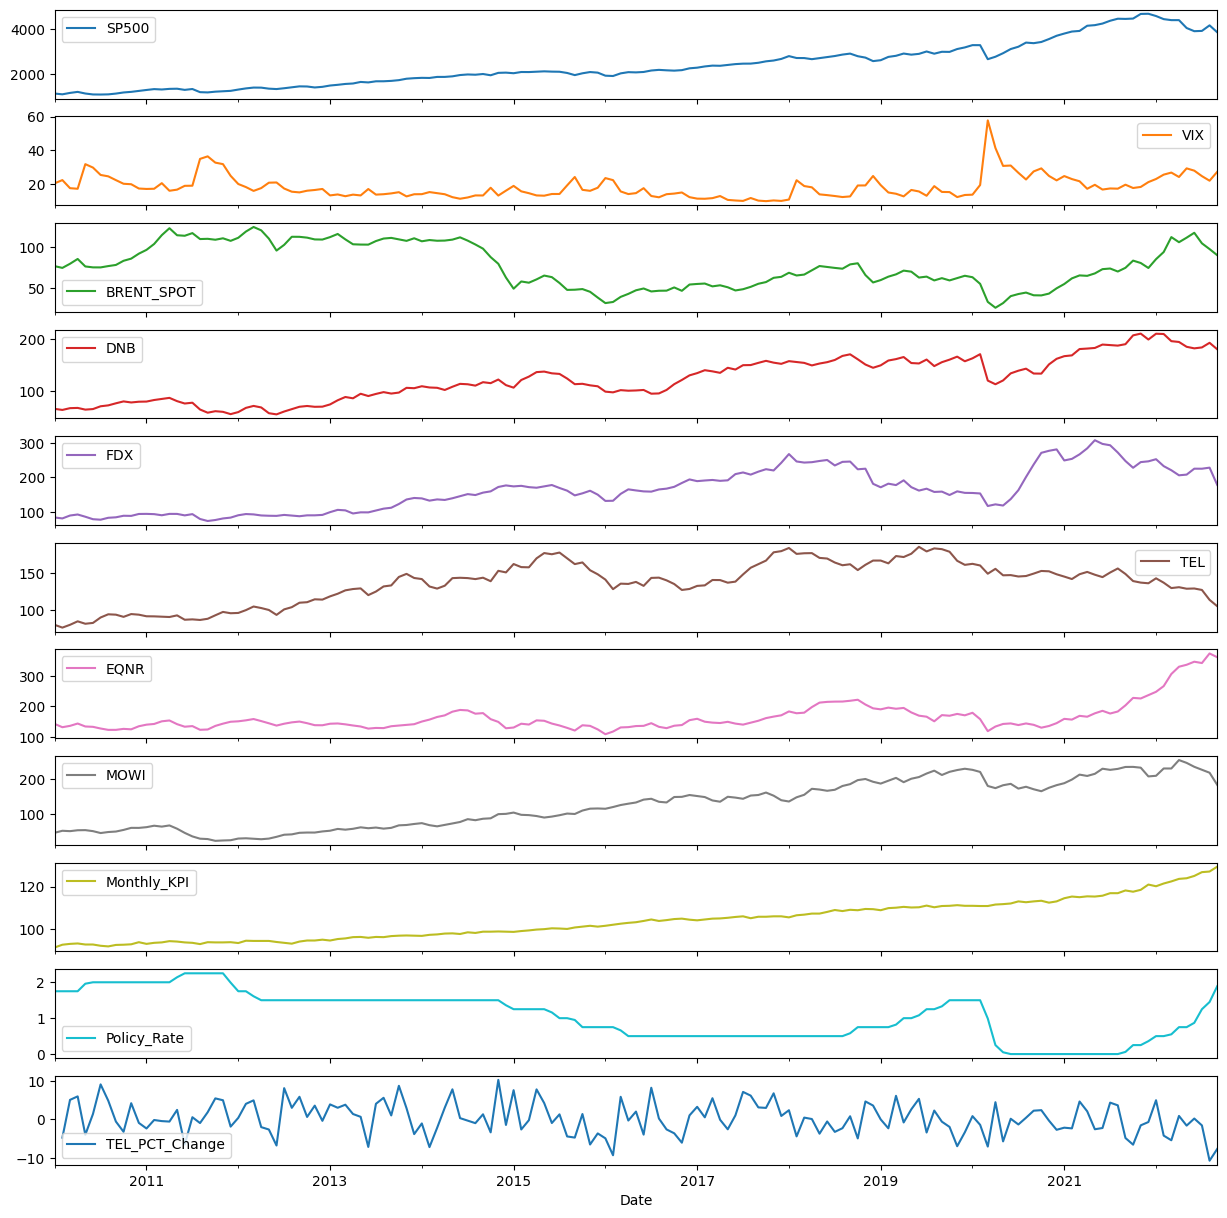

In [22]:
stocksmonthly.drop("TEL_IS_POS", axis=1).plot(subplots = True, figsize=(15,15))
plt.show()

Here we can se the variation of hour variables over the duration we want to explore. For the stockprices this shows us the growth the stockprice has had over the last 10 year period. Note that the scale of the y-values are different on the graph witch can make it difficult to gauge the differences of the magnitude of growth relative to the other variables. It does however give an insight to the change in relation to its size. Some take aways:

- We can see that for almost all our variables there was a big swing at the start of the year 2020. This is most likly due to the global Covid-19 pandemic hitting the economy. We can see that as the stockprices drop during this period the VIX that mesures insecurity rises to an all time high. This is logical due to the fact that investors get nervous when all the stocks ceash at once. What this means for us is that there is a strong negative correlation between the Vix and the stocks witch is promising in regards of using it as a indicator in our model.
- Sadly the Telenor stock as apposed to the others did not experience the growth in the period after the little crash that the other stocks did. We can also se that the norwegian stocks DNB, Mowi and Telenor experienced similar growth for the period 2011 to 2015. This is more visible in the figure underneath as it shows that the graphs on top where you can se that they do not cross over eachother during this period.
- We also note that all the data looks to be complete.

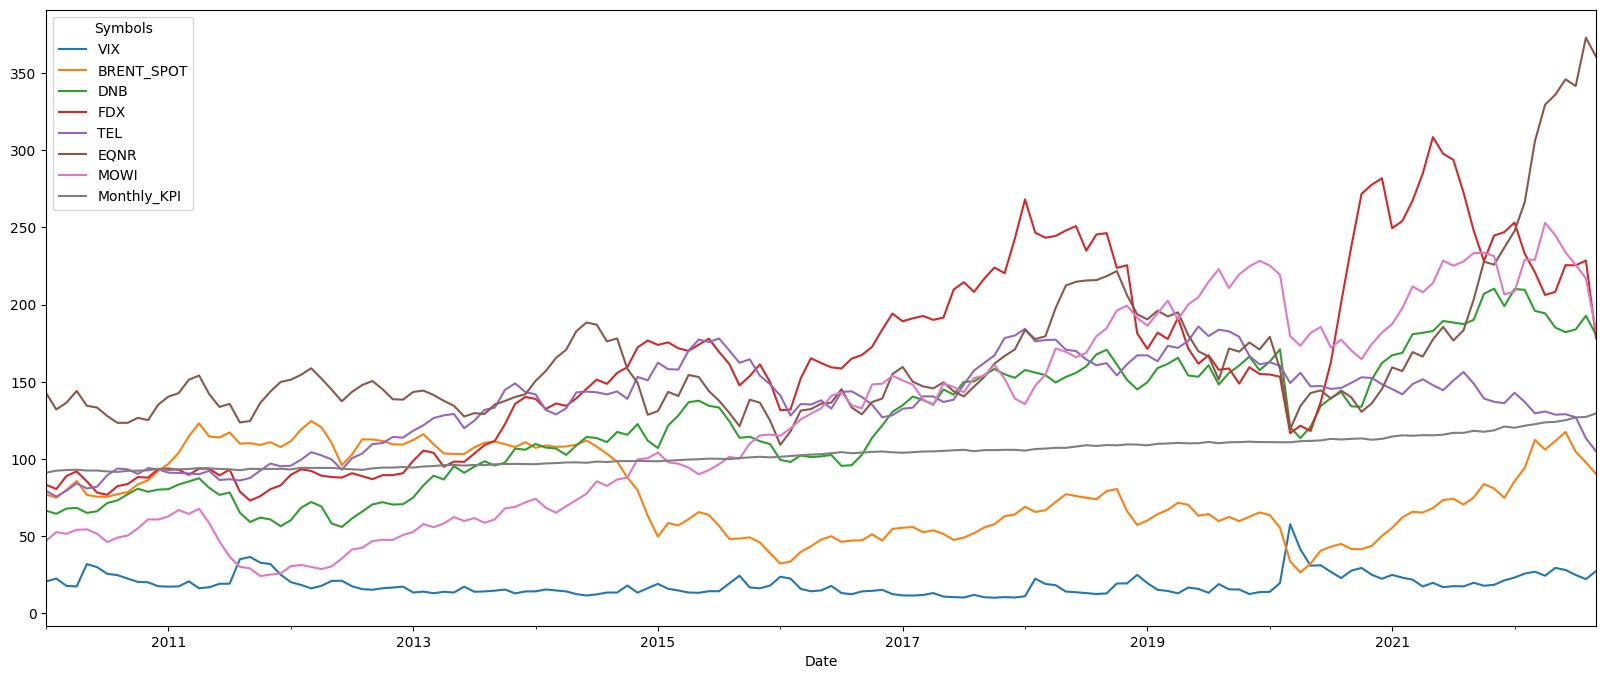

<Figure size 640x480 with 0 Axes>

In [23]:
stocksmonthly.drop(["SP500", "TEL_IS_POS", "TEL_PCT_Change", "Policy_Rate"], axis=1).plot(figsize=(20,8))

plt.figure()
plt.show()

In this diagram we see more clearly how the stock prices have changed compared to each other over the course of the last 10 years.

### Scatterplot

### Histogram

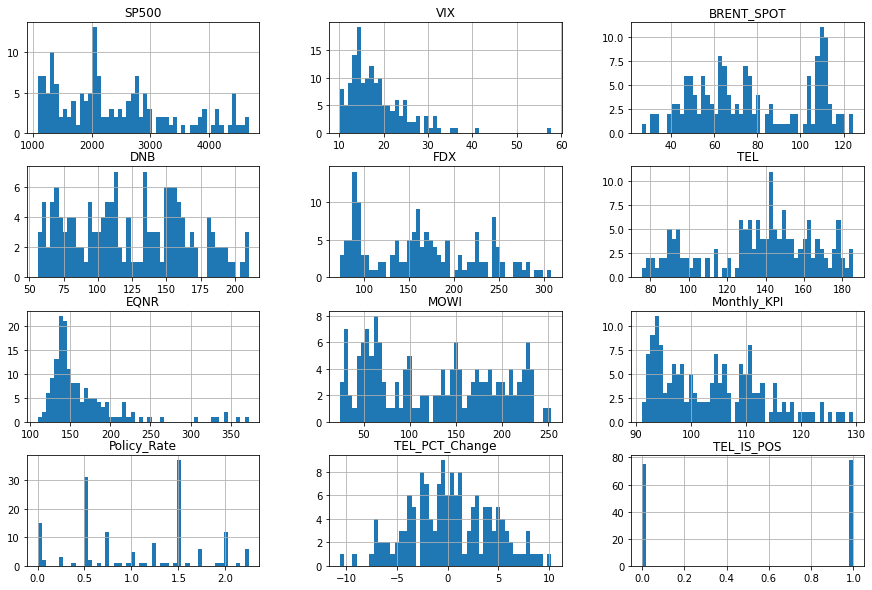

In [ ]:
stocksmonthly.hist(bins=50, figsize=(15,10))
plt.show()

We se that TEL_IS_POS is a binary vaiable. It shows us that Telenor has had more months with growth than without growth. The stock variables FDX, EQNR, TEL, MOWI all range within simular variable ranges mostly between 50-250. We see that there are no normal distributions among the stocks. The VIX indexs aswell as the EQNR stock have a long tailed distribution witch indicates that there might be outliars. TEL_PCT_Change is the procentage change in price for the TEL stock. It is closer to normaly distributed centered around 0. This makes sense seeing as the TEL_IS_POS shows us that the number of times it goes negative is almost as big as the number its positive.

### Joint distribution

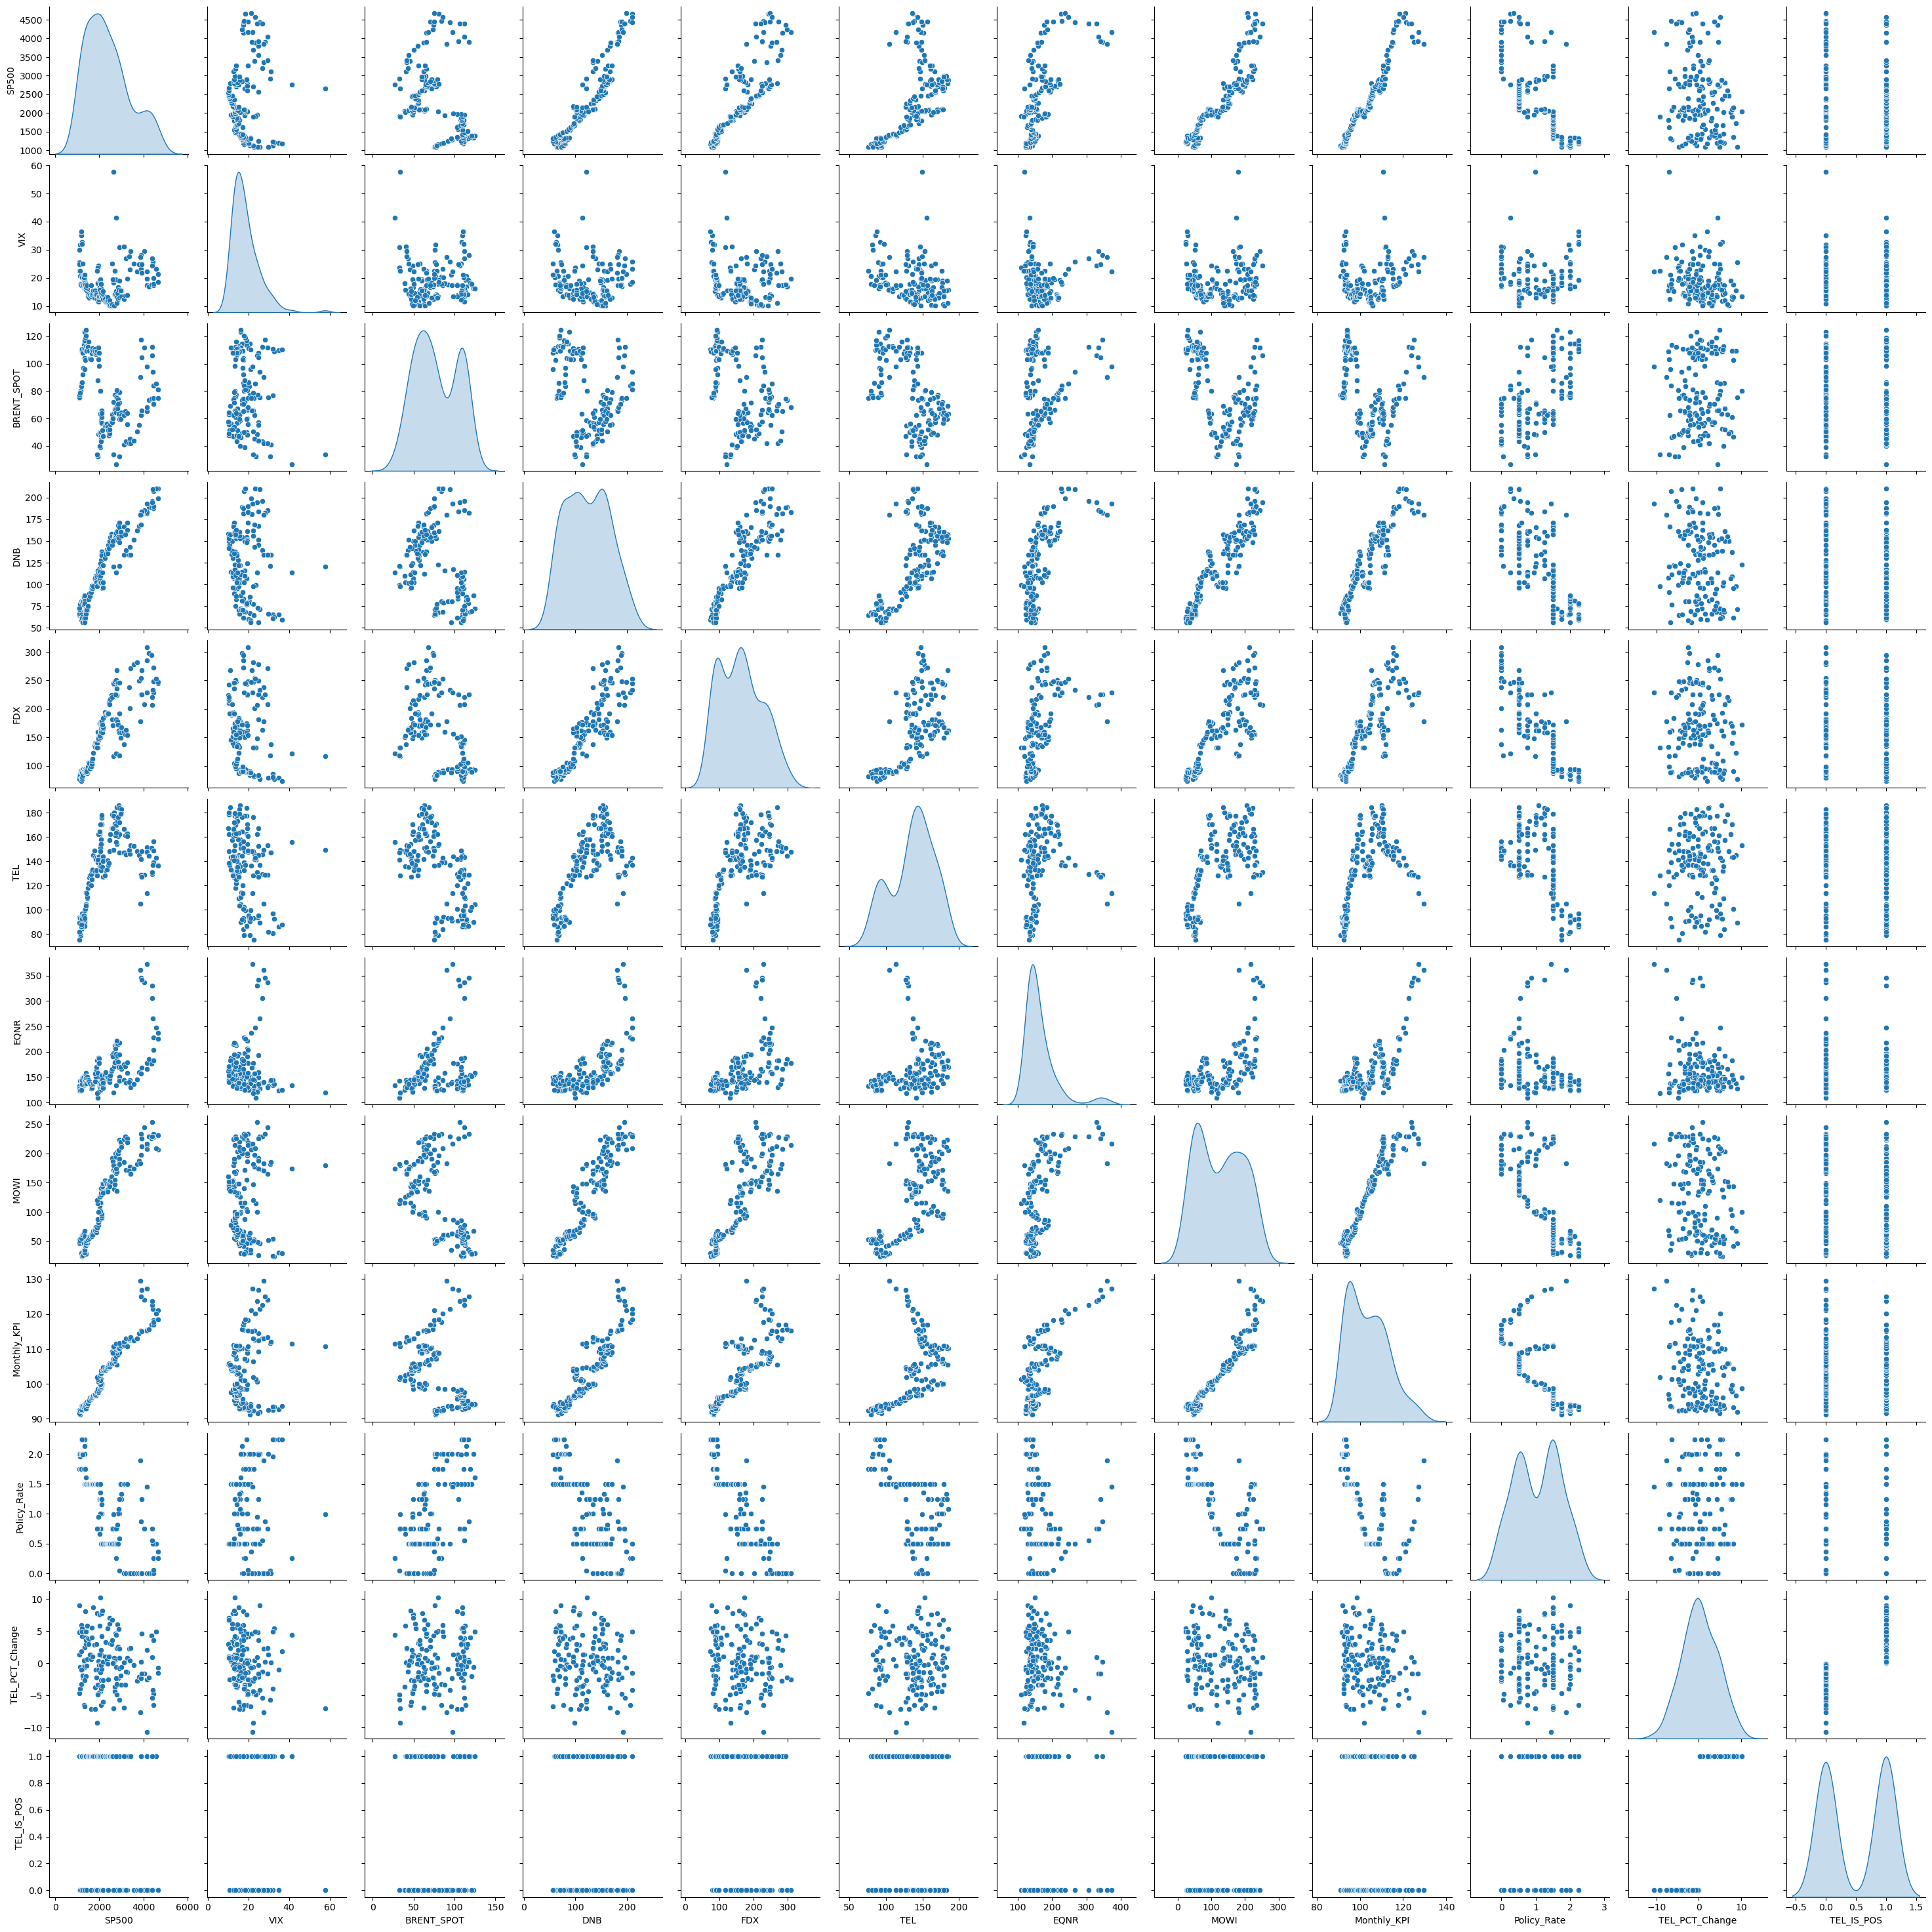

In [ ]:
#Kanskje corner = true for å ikke ha de samme flere ganger?
sns.pairplot(stocksmonthly, diag_kind='kde')
plt.show()

In the diagonal row of the pariplot we can se the distributions of the variables as a smoother curve. This allows us to tell that the TEL_PCT_Change is close to normally distributed centered around 0 as we mentioned above.
- We can also see that the variables that have a low number of different values such as the Policy_rate and the TEL_IS_POS(witch literally only has 2 possible values) precents as bimodal distributions where the data arecentered around 2 distinct peeks. This can also be said for the MOWI and BRENT_SPOT aswell even tho they have a wider range of values.
- The EQNR and VIX are both skewed to the left and displaying what are possible outliars in the higher range of values.

Looking at the bivariate plots we see that the plots of Policy_Rate and TEL_IS_POS have these horrisontal lines going across the scatterplots. This is becausse these two variables only have values for given intervals for the policy rate we see that it is usually inside a 0.25 intervall although there are some exceptions this is the norm.

For the other bivaritae plots we want to look for what variables may correlate the best with our focal point witch is the TEL stock but aslo with the other variables. Because correlation between our independet variabels could be multicolinarity issues for our analisis

- TEL seems to correlate the best with the FDX and DNB variable showing a upwards trajectory that widens towards the top. The SP500 shares the same cluster as TEL aswell. But it looks like it diverges for the bigger values of the SP500.
- For the independent variables SP500 and the KPI have a great deal of correlation, one might theorise that they both follow the greneral growth or inflation in the market. MOWI and KPI have a correlation with very little variance.

The fact that we have independant variables that covariate means that there are patterns in the dataset that might be caused by factors outside of the dataset itself. This could be a problem for our model later.

### Boxplots

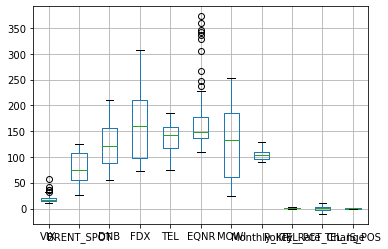

In [ ]:
#Denne viser jo godt hvor kvantilene for de forskjellige variablene ligger og kunne jo evt vært flyttet ned til punkt 4 for å ha noe visuelt der også. 
stocksmonthly.drop(["SP500", "TEL_IS_POS"], axis=1).plot.box(figsize=(15, 10), vert=False, showmeans=True)

plt.show()

The Whisker Boxplot confirmes that there are indeed outliars for Equinor and Vix values as we can see the dots to the right of the "max score"

## 4. Basic statistics <a class="anchor" id="basic-statistics"></a>

### Overview of our data

In [ ]:
stocksmonthly.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Symbols,,,,,,,,
SP500,153.0,2371.991998,978.266489,1079.803336,1550.828986,2099.283658,2897.450451,4674.772772
VIX,153.0,18.569924,6.725341,10.125455,13.974546,17.271500,21.354546,57.736818
BRENT_SPOT,153.0,77.717657,25.975428,26.537143,55.926843,74.807727,107.199500,124.544546
DNB,153.0,123.743118,41.561353,55.969048,87.497222,120.800000,155.723809,210.277274
FDX,153.0,162.975446,61.564268,73.024286,98.257727,159.393478,209.647726,308.411497
TEL,153.0,136.450683,28.809100,75.627500,118.245455,141.800001,157.854547,185.800001
EQNR,153.0,164.720067,48.155173,109.150000,136.871428,147.882609,176.690910,372.776090
MOWI,153.0,126.447722,67.033172,24.095238,60.861363,132.726318,184.640001,252.866670
Monthly_KPI,153.0,103.745752,9.230620,91.100000,95.400000,103.100000,110.400000,129.500000


To get an overview of our data, we use the descirbe() function and then transpose the datavframe to improve its readability. Taking a quick look at the table above, we can see that TEL_PCT_Change has one value less than the other variables. This is because it shows the percentage change in Telenor's stock price. Seeing as we need a previous value to calculate change, it isn't possible to calculate a change for Telenor's first stock price, and therefore the first value will be missing. 
Furthermore, from TEL_IS_POS, we can see that Telenor's stock price has on average had an increase in value 51% of the times its value has changed. We can also observe that its value has increased 0,27% on average from 2010 to 2022, with a low of -10,64% and a high of 10,21%. 
Looking at the mean and median of the stocks we included, we can see that most of the stocks have a larger mean than median (except MOWI and TEL). This means that most of the distributions will be skewed to the right.

### Mean and medain

To visualize our data more easily, we will change the data frame of the stocks into percentage change, which will then show returns.

Symbols,SP500,VIX,BRENT_SPOT,DNB,FDX,TEL,EQNR,MOWI
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.008718,0.023615,0.005057,0.008395,0.007437,0.002677,0.007967,0.011325
std,0.033564,0.250996,0.087314,0.058987,0.069185,0.041216,0.060565,0.067854
min,-0.190681,-0.311259,-0.394081,-0.295165,-0.238440,-0.106420,-0.247221,-0.214036
25%,-0.004114,-0.105169,-0.043430,-0.022957,-0.023398,-0.025278,-0.032424,-0.026672
50%,0.014026,-0.014043,0.013509,0.012202,0.009205,0.001480,0.012121,0.022352
75%,0.029286,0.085723,0.059702,0.048640,0.042087,0.031534,0.045351,0.049032
max,0.063383,1.941412,0.262058,0.136659,0.236118,0.102127,0.148639,0.184102


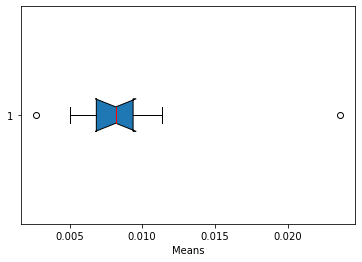

In [ ]:
stock_returns=stocksmonthly.drop(["Monthly_KPI","Policy_Rate","TEL_PCT_Change","TEL_IS_POS"], axis=1).pct_change().describe()

plt.boxplot(stock_returns.iloc[1],notch = True, patch_artist = True, vert = False, medianprops = dict(color = "red"))
plt.xlabel("Means")

stock_returns

First, we use a boxplot to visualize the means of the different stocks, because we believe this to be the best way of visualizing our data. From this boxplot we can see that the means range from approximately 0,002 to 0,024 and has a median of around 0,08. Furthermore, we can see that the quantiles range from 0,006 to 0,009.

### Standard deviation

Text(0.5, 0, 'Standard deviations')

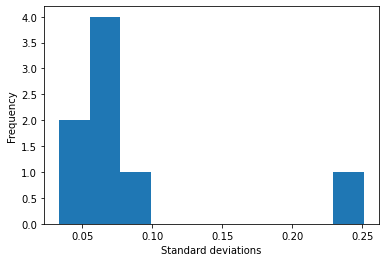

In [ ]:
stock_returns.iloc[2].plot.hist()
plt.xlabel("Standard deviations")

Then we plot a histogram of the standard deviations of our stocks, which is widely regarded as one of the most important measures of risk. From this figure we can se that most of the standard deviations range approximately from 0,025 to 0,1, with one outlier around 0,25.  

### Correlation

## 5. Data preparation for machine learning <a class="anchor" id="dataprep"></a>

## 6. Model training and analysis<a class="anchor" id="model-train"></a>

## 7. Discussion and implementation <a class="anchor" id="discussion"></a>

## 8. Conclusion <a class="anchor" id="conclusion"></a>

## 9. References <a class="anchor" id="references"></a>

SSB \
Norges Bank \
Yahoo

## 10. Word Count <a class="anchor" id="word-count"></a>

In [ ]:
import json

with open('Arbeidskrav.ipynb') as json_file:
    data = json.load(json_file)

wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] 
            wordCount = wordCount + len(temp)
            
print("We have", wordCount, "words excluding coding blocks.")

We have 2716 words excluding coding blocks.
